In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Polynomial Linear Regression
# y = a + bx + cx^2 + ... + mx^n + ...

In [2]:
dataset = pd.read_csv("../../Data/Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset = dataset.drop(["Position"], axis=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [6]:
X = dataset.drop(["Salary"] , axis=True)
y = dataset["Salary"]   

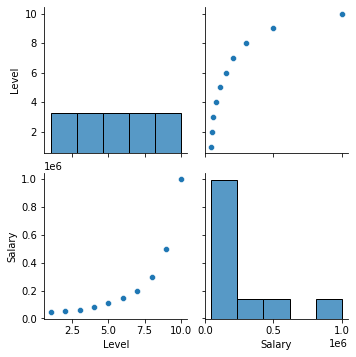

In [7]:
sns.pairplot(dataset)

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train) 

LinearRegression()

In [10]:
acc_train =  lin_reg.score(X_train , y_train)
acc_test =  lin_reg.score(X_test , y_test)

print("Training accuracy : " ,acc_train)
print("Test accuracy : " ,acc_test)

Training accuracy :  0.6366049276570868
Test accuracy :  0.8451346684575974


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train )

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly , y_train) 

LinearRegression()

In [32]:
X_poly_test = poly_reg.transform(X_test)

In [33]:
acc_train =  lin_reg2.score(X_poly , y_train)
acc_test =  lin_reg2.score(X_poly_test , y_test)

print("Training accuracy : " ,acc_train)
print("Test accuracy : " ,acc_test)

Training accuracy :  0.9995857211026753
Test accuracy :  0.9714666803843249


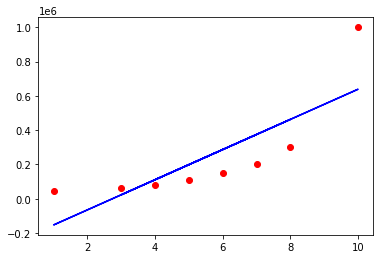

In [34]:
plt.scatter(X_train, y_train, color = 'red')
x_train = X_train.to_numpy()
plt.plot(x_train, lin_reg.predict(X_train), color = 'blue')
plt.show()

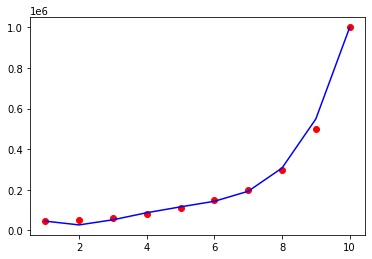

In [35]:
plt.scatter(X, y, color = 'red')
x = X.to_numpy()
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.show()